In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import lightgbm as lgb
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
import kaggler

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [4]:
data_dir = Path('./Dacon')
feature_dir = Path('./Dacon')
sub_dir = Path('./Dacon')

trn_file = data_dir / 'feature_1.csv'
tst_file = data_dir / 'test.csv'
sample_file = data_dir / 'sample_submission.csv'

target_col = 'class'
seed = 42

In [5]:
algo_name = 'lgb'
feature_name = 'feature'
model_name = f'{algo_name}_{feature_name}'

feature_file = feature_dir / f'{feature_name}.csv'
sub_file = sub_dir / f'{model_name}.csv'

In [6]:
df = pd.read_csv(trn_file, index_col=0)
print(df.shape)
df.head()

(320000, 17)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,
0,1.7535,0.0630,0.8687,0.0095,0.0011,-0.1015,1.8171,0.1142,0.9095,0.0191,0.0011,0.1204,0.1199,0.1207,0.1206,0.1202,0
1,-2.4673,-0.1387,-2.9213,-0.0743,-0.0649,-0.0935,-2.4238,-0.2374,-2.8540,-0.1562,-0.1054,0.6663,0.6887,0.6418,0.6543,0.6778,1
2,-1.5759,-0.0820,-1.5001,-0.0339,-0.0267,-0.1005,-1.5706,-0.1428,-1.4768,-0.0730,-0.0444,-1.3179,-1.2910,-1.3437,-1.3309,-1.3046,0
3,2.9854,0.0904,1.6951,0.0518,0.0483,-0.1013,2.9761,0.1556,1.6781,0.1054,0.0758,0.2548,0.2501,0.2593,0.2571,0.2525,0
4,2.3649,0.0746,0.8911,0.0219,0.0194,-0.1014,2.1535,0.1241,0.8469,0.0414,0.0284,0.1563,0.1504,0.1622,0.1593,0.1534,0


In [7]:
y = df[target_col].values[:320000]
df.drop(target_col, axis=1, inplace=True)
trn = df.iloc[:320000]
tst = pd.read_csv(tst_file, index_col=0)
feature_name = df.columns.tolist()
print(y.shape, trn.shape, tst.shape)
print(y)

(320000,) (320000, 16) (80000, 18)
[0 1 0 ... 0 0 0]


In [8]:
X_trn, X_val, y_trn, y_val = train_test_split(trn, y, test_size=.2, random_state=seed)
print(X_trn.shape, X_val.shape, y_trn.shape, y_val.shape)

(256000, 16) (64000, 16) (256000,) (64000,)


In [9]:
tst

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
id,,,,,,,,,,,,,,,,,,
320000,19.1431,18.0172,17.4733,17.1144,16.9263,1.2130e-01,19.0750,17.9550,17.4308,17.0838,16.9087,1,1,1.1563,1.1515,1.1613,1.1588,1.1539
320001,18.7409,17.1705,16.3691,15.9865,15.7307,-6.6907e-05,15.0703,14.3098,14.3901,14.5160,14.6372,2,2,1.0076,1.0074,1.0080,1.0078,1.0075
320002,19.2980,17.8803,17.2221,16.8096,16.6352,1.1001e-01,19.1004,17.7726,17.1460,16.7497,16.5689,1,1,1.3809,1.3905,1.3715,1.3761,1.3856
320003,18.0775,17.1569,16.9041,16.8118,16.7955,2.9697e-05,17.9729,17.0735,16.8470,16.7700,16.7668,1,1,1.1408,1.1408,1.1409,1.1408,1.1408
320004,17.8325,16.7646,16.2135,15.8722,15.6621,6.8471e-02,17.7545,16.6794,16.1563,15.8315,15.6433,2,2,1.1110,1.1077,1.1145,1.1127,1.1093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,19.6734,18.6617,18.2708,18.1225,18.0627,-3.1726e-04,19.3361,18.3933,18.0860,17.9861,17.9670,17,17,1.1858,1.1863,1.1855,1.1857,1.1861
399996,21.5229,20.7283,20.6087,21.0049,20.8458,6.5455e-02,21.3993,20.6399,20.5451,20.9507,20.7827,8,4,1.2850,1.2908,1.2793,1.2821,1.2878
399997,19.3991,18.2411,18.1605,18.1978,18.2018,-8.4180e-04,18.9136,17.8753,17.9047,18.0043,18.0400,1,1,1.1885,1.1886,1.1885,1.1885,1.1885


In [10]:
tst.drop(['nDetect','nObserve'],axis=1,inplace=True)

In [11]:
clf = lgb.LGBMClassifier(objective='multiclass',
                         n_estimators=10000,
                         num_leaves=64,
                         learning_rate=0.1,
                         min_child_samples=10,
                         subsample=.5,
                         subsample_freq=1,
                         colsample_bytree=.8,
                         random_state=seed,
                         n_jobs=-1)
clf.fit(X_trn, y_trn,
        eval_set=[(X_val, y_val)],
        eval_metric='multiclass',
        early_stopping_rounds=10)
p_val = clf.predict(X_val)
p_tst = clf.predict(tst)

[1]	valid_0's multi_logloss: 0.852655
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 0.749664
[3]	valid_0's multi_logloss: 0.667389
[4]	valid_0's multi_logloss: 0.612178
[5]	valid_0's multi_logloss: 0.554941
[6]	valid_0's multi_logloss: 0.509933
[7]	valid_0's multi_logloss: 0.471548
[8]	valid_0's multi_logloss: 0.43646
[9]	valid_0's multi_logloss: 0.40661
[10]	valid_0's multi_logloss: 0.380942
[11]	valid_0's multi_logloss: 0.360043
[12]	valid_0's multi_logloss: 0.340592
[13]	valid_0's multi_logloss: 0.325408
[14]	valid_0's multi_logloss: 0.312054
[15]	valid_0's multi_logloss: 0.298783
[16]	valid_0's multi_logloss: 0.28734
[17]	valid_0's multi_logloss: 0.27702
[18]	valid_0's multi_logloss: 0.267991
[19]	valid_0's multi_logloss: 0.25999
[20]	valid_0's multi_logloss: 0.253428
[21]	valid_0's multi_logloss: 0.247057
[22]	valid_0's multi_logloss: 0.242715
[23]	valid_0's multi_logloss: 0.237515
[24]	valid_0's multi_logloss: 0.232832
[25]	valid_0's mu

In [12]:
print(f'{accuracy_score(y_val, p_val) * 100:.4f}%')


92.3156%


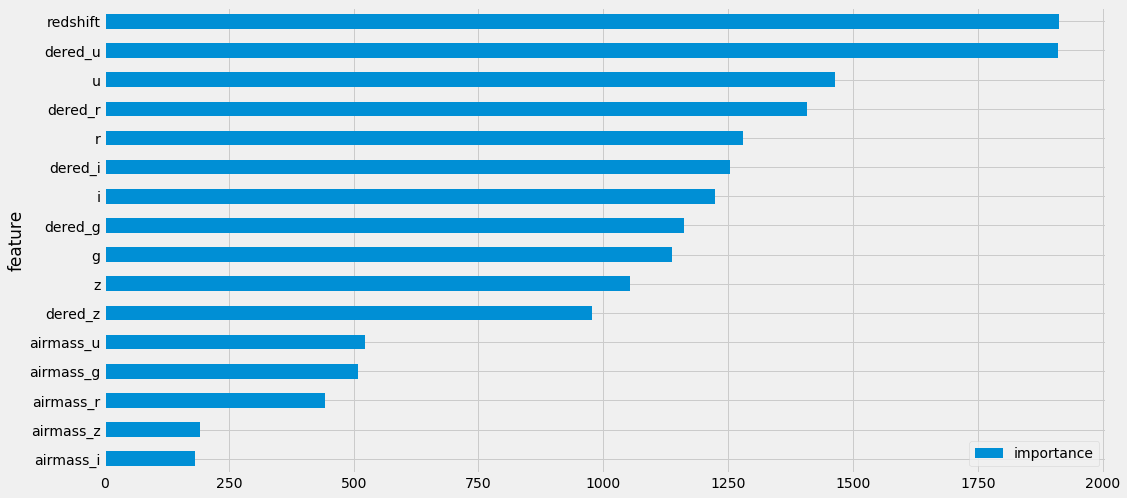

In [13]:
imp = pd.DataFrame({'feature': trn.columns, 'importance': clf.feature_importances_})
imp = imp.sort_values('importance').set_index('feature')
imp.plot(kind='barh')

In [14]:
sub = pd.read_csv(sample_file, index_col=0)
print(sub.shape)
sub.head()

(80000, 1)


,class
id,
320000,0
320001,0
320002,0
320003,0
320004,0


In [15]:
sub[target_col] = p_tst
sub.head()

,class
id,
320000,0
320001,0
320002,0
320003,0
320004,0


In [16]:
sub[target_col].value_counts()

0    79988
2       12
Name: class, dtype: int64

In [17]:
sub.to_csv(sub_file)